## HK-cities Dataset

### Characteristics Only

#### Data import and drop unnecessary rows

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object, 'zimmeranzahl': object, 'click_customer': object})

df_original = pd.DataFrame(wk_cities)

#All columns sorted by category
#Independent and dependent variabels, columns which will not be dropped: edat, zimmeranzahl, schlafzimmer, badezimmer, wohnflaeche, grundstuecksflaeche, objektzustand, parkplatz, price_sqm, kaufpreis
time_information = ['adat']
object_features = ['ausstattung', 'balkon', 'denkmalobjekt', 'einbaukueche', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Wohnung', 'keller']
general_object_information = ['anzahletagen', 'bauphase', 'einliegerwohnung', 'immobilientyp', 'nebenraeume', 'rollstuhlgerecht', 'wohngeld']
area_information = ['grundstuecksflaeche', 'nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'energieeffizienzklasse', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'spell', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']

columns_to_drop = time_information + object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_original.drop(columns=columns_to_drop, axis=1, inplace=True)

df_original.describe(include='all')

,obid,plz,kaufpreis,baujahr,wohnflaeche,etage,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,edat,price_sqm
count,9.273190e+05,927319,9.273190e+05,793327.000000,927319.000000,927319,927319,927319,927319,927319,927319,927319,927319,927319.000000
unique,NaN,2317,NaN,NaN,NaN,48,44,18,8,3,3,11,192,NaN
top,NaN,10245,NaN,NaN,NaN,Other missing,3,Other missing,1,No,Other missing,Not specified,2022m12,NaN
freq,NaN,5888,NaN,NaN,NaN,273242,313604,361803,513075,393133,692545,266277,10767,NaN
mean,8.222709e+07,NaN,2.942670e+05,1970.057329,83.275360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3428.995769
std,2.903465e+07,NaN,2.382443e+05,38.522585,33.938178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180.835325
min,6.745100e+06,NaN,1.610000e+04,1500.000000,24.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397.826080
25%,5.744410e+07,NaN,1.210000e+05,1954.000000,59.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1778.947400
50%,7.736723e+07,NaN,2.290000e+05,1973.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911.504400
75%,1.072567e+08,NaN,3.950000e+05,2002.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.000000


#### Data Cleaning of relevant columns

In [43]:
df_original['edat_year'] = df_original['edat'].astype(str).str[:4]
df_original['edat_year'] = pd.to_numeric(df_original['edat_year'])

df = df_original[df_original['baujahr'].notna()]
df['age'] = df['edat_year'] - df['baujahr']

df = df[df['zimmeranzahl'].notna()]
df = df[~df['zimmeranzahl'].str.contains("Implausible value")]
df['zimmeranzahl'] = pd.to_numeric(df['zimmeranzahl'])
df = df[(df['zimmeranzahl'] > 0) & (df['zimmeranzahl'] < 30)]

df = df[df['schlafzimmer'].notna()]
df = df[~df['schlafzimmer'].str.contains("Other missing")]
df = df[~df['schlafzimmer'].str.contains("Implausible value")]
df['schlafzimmer'] = pd.to_numeric(df['schlafzimmer'])
df = df[(df['schlafzimmer'] > 0) & (df['schlafzimmer'] < 15)]

df = df[df['badezimmer'].notna()]
df = df[~df['badezimmer'].str.contains("Other missing")]
df = df[~df['badezimmer'].str.contains("Implausible value")]
df['badezimmer'] = pd.to_numeric(df['badezimmer'])
df = df[(df['badezimmer'] > 0) & (df['badezimmer'] < 15)]


df = df[~df['objektzustand'].str.contains("Not specified")]
df = df[~df['objektzustand'].str.contains("By arrangement")]
df['objektzustand'] = df['objektzustand'].astype('category')
df['objektzustand'] = df['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
df['objektzustand'] = df['objektzustand'].cat.codes

df = df[~df['aufzug'].str.contains("Other missing")]
df['aufzug'] = df['aufzug'].astype('category')
df['aufzug'] = df['aufzug'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df['aufzug'] = df['aufzug'].cat.codes

df

,obid,plz,kaufpreis,baujahr,wohnflaeche,etage,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,edat,price_sqm,edat_year,age
0,43723127,22145,77000.0,1970.0,45.00,1,2.0,1,1,1,Yes,8,2007m11,1711.1111,2007,37.0
8,41261600,22119,95000.0,1960.0,34.00,Other missing,2.0,1,1,1,Yes,3,2007m5,2794.1177,2007,47.0
19,41801997,22529,195000.0,2008.0,107.00,2,3.0,2,1,0,Yes,8,2007m7,1822.4299,2007,-1.0
33,40446111,22761,159000.0,1999.0,71.00,1,2.0,1,1,1,Other missing,2,2007m2,2239.4365,2007,8.0
46,39978694,22359,272100.0,2006.0,95.00,2,3.0,2,1,1,Yes,8,2007m3,2864.2104,2007,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927305,133575149,4315,130000.0,1903.0,45.13,2,2.0,2,1,0,Other missing,3,2022m6,2880.5671,2022,119.0
927306,130928804,4347,140000.0,1935.0,51.44,1,2.0,1,1,0,No,5,2022m1,2721.6174,2022,87.0
927310,132085177,4288,116000.0,1991.0,50.76,0,2.0,1,1,0,Yes,5,2022m5,2285.2639,2022,31.0
927316,137793368,4129,190000.0,1925.0,73.87,2,3.0,2,1,0,Other missing,4,2022m12,2572.0862,2022,97.0


#### Regression on housing characteristics only

In [44]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [45]:
housing_model = ols("""kaufpreis ~ wohnflaeche 
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + objektzustand
                                            + age
                                            + aufzug""", data=df).fit()
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

## Macroeconomic factors only

#### Merge interest rate, construction investment and household income

In [46]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df['date_quarter'] = df.apply(lambda x: convert_date(x['edat']), axis = 1)

df.drop(columns=['obid', 'plz', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'objektzustand', 'edat', 'edat_year', 'age'], axis=1, inplace=True)
df = df.groupby('date_quarter', as_index=False).mean()

interest_rate = pd.read_csv('./Data/Macroeconomic Data/Interest-rate.csv')
df_interest_rate = pd.DataFrame(interest_rate)
df = pd.merge(df, df_interest_rate, how="inner", on="date_quarter")

construction_investment = pd.read_csv('./Data/Macroeconomic Data/Construction-investment.csv')
df_construction_investment = pd.DataFrame(construction_investment)
df = pd.merge(df, df_construction_investment, how="inner", on="date_quarter")

household_income = pd.read_csv('./Data/Macroeconomic Data/Household-income.csv')
df_household_income = pd.DataFrame(household_income)
df = pd.merge(df, df_household_income, how="inner", on="date_quarter")

df

,date_quarter,kaufpreis,aufzug,price_sqm,interest_rate,housing_construction_investment,household_income
0,2007-Q1,204090.824716,0.854414,2249.455383,4.737,5.410,1584484
1,2007-Q2,197158.825143,0.868018,2281.767692,4.899,5.141,1568216
2,2007-Q3,198454.284224,0.857644,2272.233526,5.136,5.148,1579972
3,2007-Q4,201914.309837,0.849388,2305.641651,5.034,5.133,1633608
4,2008-Q1,203197.393807,0.839898,2316.096458,4.946,5.241,1626592
...,...,...,...,...,...,...,...
57,2021-Q2,502969.051896,0.477955,5967.895552,1.283,7.281,2207560
58,2021-Q3,500067.512878,0.444772,6070.741455,1.297,7.209,2239500
59,2021-Q4,505388.786606,0.435021,6113.325431,1.319,7.163,2286972
60,2022-Q1,495511.183366,0.411560,6108.010164,1.520,7.515,2332480


#### Clean Unemployment and merge

In [47]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)

def convert_date_unemployment(x):
    date_string = str(x)
    date = date_string.split('-')[-1]
    
    if (date == 'Januar' or date == 'Februar' or date == 'März'):
        quarter = '1'
    elif (date == 'April' or date == 'Mai' or date == 'Juni'):
        quarter = '2'
    elif (date == 'Juli' or date == 'August' or date == 'September'):
        quarter = '3'
    elif (date == 'Oktober' or date == 'November' or date == 'Dezember'):
        quarter = '4'
    else:
        quarter = '0'
    year = date_string.split('-')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_unemployment_rate['date_quarter'] = df_unemployment_rate.apply(lambda x: convert_date_unemployment(x['Jahr_Monat']), axis = 1)
df_unemployment_rate = df_unemployment_rate.groupby('date_quarter', as_index=False).mean()
df_unemployment_rate.drop(columns=['Erwerbspersonen', 'Erwerbstätige', 'Erwerbslose'], axis=1, inplace=True)

df = pd.merge(df, df_unemployment_rate, how="inner", on="date_quarter")

df

,date_quarter,kaufpreis,aufzug,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote
0,2007-Q1,204090.824716,0.854414,2249.455383,4.737,5.410,1584484,9.133333
1,2007-Q2,197158.825143,0.868018,2281.767692,4.899,5.141,1568216,8.766667
2,2007-Q3,198454.284224,0.857644,2272.233526,5.136,5.148,1579972,8.400000
3,2007-Q4,201914.309837,0.849388,2305.641651,5.034,5.133,1633608,8.133333
4,2008-Q1,203197.393807,0.839898,2316.096458,4.946,5.241,1626592,7.833333
...,...,...,...,...,...,...,...,...
57,2021-Q2,502969.051896,0.477955,5967.895552,1.283,7.281,2207560,3.666667
58,2021-Q3,500067.512878,0.444772,6070.741455,1.297,7.209,2239500,3.466667
59,2021-Q4,505388.786606,0.435021,6113.325431,1.319,7.163,2286972,3.233333
60,2022-Q1,495511.183366,0.411560,6108.010164,1.520,7.515,2332480,3.100000


##### Clean planning permissions and merge

In [48]:
planning_permissions = pd.read_csv('./Data/Macroeconomic Data/Planning-permissions.csv')
df_planning_permissions = pd.DataFrame(planning_permissions)

df_planning_permission_new = pd.DataFrame(np.repeat(df_planning_permissions.values, 4, axis=0))
df_planning_permission_new.columns = df_planning_permissions.columns

def rowIndex(row):
    return row.name
df_planning_permission_new['rowIndex'] = df_planning_permission_new.apply(rowIndex, axis=1)

def add_quarter(Jahr, rowIndex):
    if (rowIndex % 4 == 0):
        quarter = 'Q1'
    elif (rowIndex % 4 == 1):
        quarter = 'Q2'
    elif (rowIndex % 4 == 2):
        quarter = 'Q3'
    elif (rowIndex % 4 == 3):
        quarter = 'Q4'
    else:
        quarter = '0'
    date_quarter = Jahr.astype(str) + '-' + quarter
    return date_quarter
df_planning_permission_new['date_quarter'] = df_planning_permission_new.apply(lambda x: add_quarter(x.Jahr, x.rowIndex), axis = 1)

df_planning_permission_new.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)
df_planning_permission_new['Baugenehmigungen'] = df_planning_permission_new['Baugenehmigungen'].div(4)

df = pd.merge(df, df_planning_permission_new, how="inner", on="date_quarter")

df

,date_quarter,kaufpreis,aufzug,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen
0,2007-Q1,204090.824716,0.854414,2249.455383,4.737,5.410,1584484,9.133333,45.50
1,2007-Q2,197158.825143,0.868018,2281.767692,4.899,5.141,1568216,8.766667,45.50
2,2007-Q3,198454.284224,0.857644,2272.233526,5.136,5.148,1579972,8.400000,45.50
3,2007-Q4,201914.309837,0.849388,2305.641651,5.034,5.133,1633608,8.133333,45.50
4,2008-Q1,203197.393807,0.839898,2316.096458,4.946,5.241,1626592,7.833333,43.75
...,...,...,...,...,...,...,...,...,...
57,2021-Q2,502969.051896,0.477955,5967.895552,1.283,7.281,2207560,3.666667,95.25
58,2021-Q3,500067.512878,0.444772,6070.741455,1.297,7.209,2239500,3.466667,95.25
59,2021-Q4,505388.786606,0.435021,6113.325431,1.319,7.163,2286972,3.233333,95.25
60,2022-Q1,495511.183366,0.411560,6108.010164,1.520,7.515,2332480,3.100000,86.50


#### Number of transactions

In [50]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_original['date_quarter'] = df_original.apply(lambda x: convert_date(x['edat']), axis = 1)


df_original = df_original.groupby('date_quarter', as_index=False).count()
df_original['transactions'] = df_original['kaufpreis']
df_original.drop(columns=['obid', 'plz', 'kaufpreis', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'price_sqm', 'edat_year'], axis=1, inplace=True)

df = pd.merge(df, df_original, how="inner", on="date_quarter")

df

,date_quarter,kaufpreis,aufzug_x,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen,etage,aufzug_y,transactions


#### Regression analysis

In [ ]:
housing_model = ols("""price_sqm ~ interest_rate 
                                            + Erwerbslosenquote
                                            + household_income
                                            + housing_construction_investment
                                            + Baugenehmigungen
                                            +transactions""", data=df).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


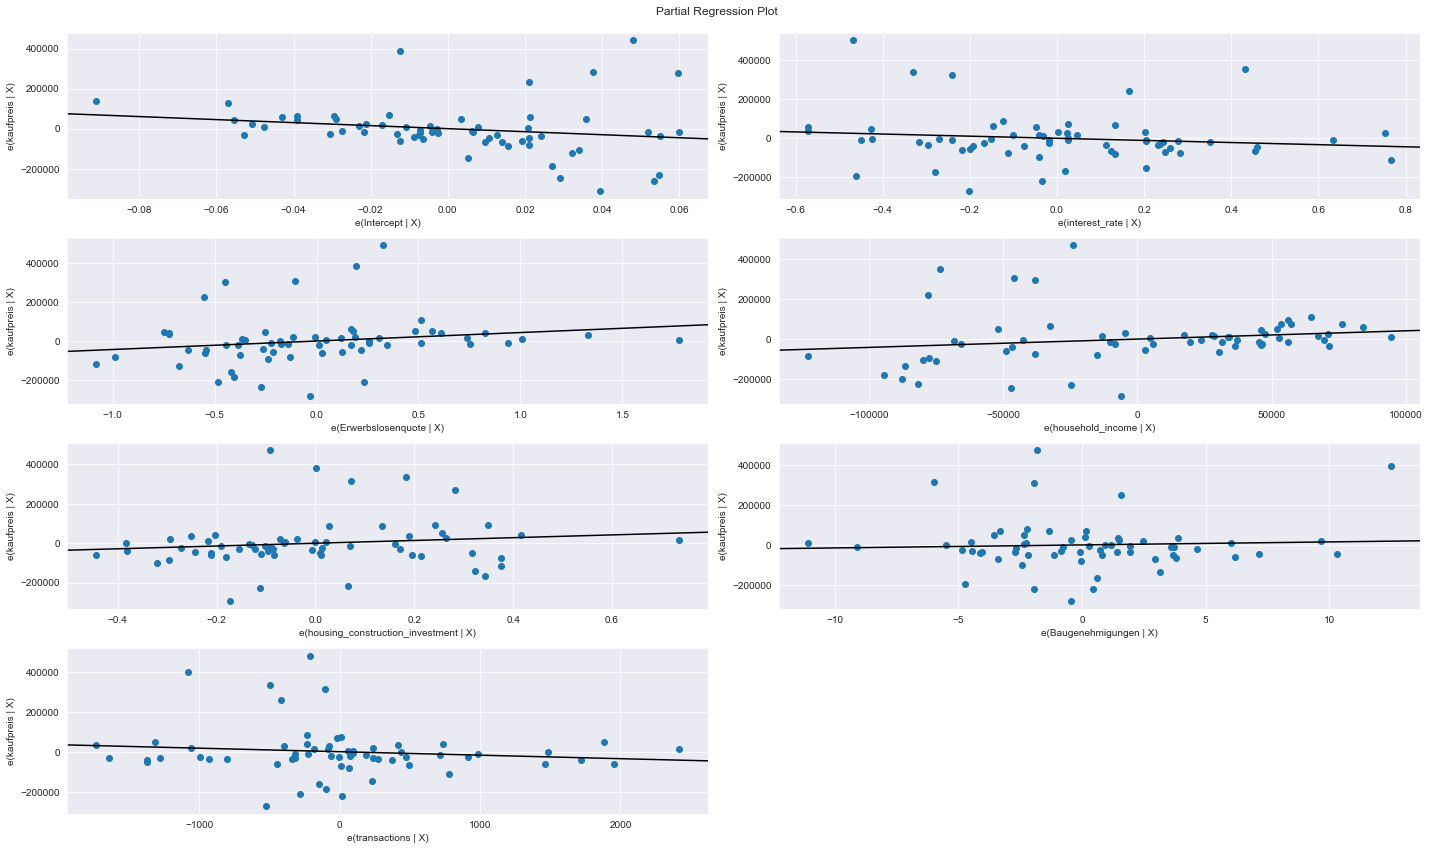

In [ ]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

Regression model for all factors included
housing_model = ols("""kaufpreis ~ wohnflaeche 
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + objektzustand
                                            + parkplatz
                                            + age
                                            + grundstuecksflaeche
                                            + interest_rate
                                            + Erwerbslosenquote
                                            + household_income
                                            + housing_construction_investment""", data=df).fit()
# summarize our model
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())